<a href="https://colab.research.google.com/github/Navalsaxena/Zomato-Data-Analysis/blob/main/zomatoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
plt.style.use("dark_background")


In [ ]:
zomatoB = pd.read_csv("zomato.csv")

In [ ]:
zomatoB.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:

zomatoB.shape

(51717, 17)

In [ ]:
zomatoB.sample()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
22181,https://www.zomato.com/bangalore/natural-mumba...,"1-90/18, 100 Feet Ring Road, 9th Main Road, 1s...",Natural Mumbai Kulfi,Yes,No,3.5/5,8,+91 8296375974,BTM,Dessert Parlor,NaN,Ice Cream,130,"[('Rated 5.0', 'RATED\n Absolutely love the v...","['Traditional Malai Stick Kulfi', 'Special Kes...",Delivery,JP Nagar


In [ ]:
zomatoB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
zomatoB.describe

<bound method NDFrame.describe of                                                      url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3    

In [ ]:
zomatoB.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
zomatoB.describe

<bound method NDFrame.describe of                                                      url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3    

In [ ]:
zomatoB.duplicated().sum()

0

In [ ]:
zomatoB.isnull().mean()*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [ ]:
zomatoB.drop(columns= ["url","address","phone", "reviews_list","dish_liked"],axis=1,inplace=True)

In [ ]:
zomatoB.describe

<bound method NDFrame.describe of                                                     name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                    location  \
0            Yes   4.1/5  

In [ ]:
zomatoB.isnull().mean()*100

name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
location                        0.040606
rest_type                       0.438927
cuisines                        0.087012
approx_cost(for two people)     0.669026
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

zomatoB.isnull().sum()

In [ ]:
zomatobb = ["rate", "location", "rest_type", "cuisines", "approx_cost(for two people)"]
for column in zomatobb:
    zomatoB[column].fillna(zomatoB[column].mode()[0], inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_11180\5887076.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zomatoB[column].fillna(zomatoB[column].mode()[0], inplace=True)


In [ ]:
zomatoB.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [ ]:
zomatoB.rename(columns={"approx_cost(for two people)": "cost_for_two"}, inplace=True)
zomatoB.rename(columns={"listed_in(type)": "type"}, inplace=True)
zomatoB.rename(columns={"listed_in(city)": "Area"}, inplace=True)


In [ ]:
zomatoB.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost_for_two    0
menu_item       0
type            0
Area            0
dtype: int64

In [ ]:
zomatoB.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost_for_two    0
menu_item       0
type            0
Area            0
dtype: int64

In [ ]:
zomatoB.shape

(51717, 12)

In [ ]:
zomatoB.shape


(51717, 12)

In [ ]:
zomatoB.isnull().sum()



name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost_for_two    0
menu_item       0
type            0
Area            0
dtype: int64

In [ ]:
zomatoB["rate"].fillna(zomatoB["rate"].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11180\1717000586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zomatoB["rate"].fillna(zomatoB["rate"].mode()[0], inplace=True)


In [ ]:
zomatoB["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
def handlerate(value):
    if (value == "NEW" or value == "-"):
        return np.nan
    else:
        value = str(value).split("/")
        value = value[0]
        return float(value)

zomatoB["rate"] = zomatoB["rate"].apply(handlerate)

In [ ]:
zomatoB["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
zomatoB["rate"].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
zomatoB["rate"].isnull().sum()

10052

In [ ]:
zomatoB["rate"].shape

(51717,)

In [ ]:
zomatoB["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima

In [ ]:
zomatoB.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,menu_item,type,Area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari


In [ ]:
zomatoB.drop(["menu_item"],axis=1,inplace=True)

In [ ]:
zomatoB.drop(["Area"],axis=1,inplace=True)

In [ ]:
zomatoB["cost_for_two"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [ ]:
zomatoB["cost_for_two"].dtype

dtype('O')

In [ ]:
def handlecost(value):
    value = str(value)
    if ("," in value):
        value = value.replace("," , "")
        return float(value)
    else:
        return float(value)

zomatoB["cost_for_two"] = zomatoB["cost_for_two"].apply(handlecost)

In [ ]:
zomatoB["cost_for_two"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [ ]:
zomatoB["cost_for_two"].dtype

dtype('float64')

In [ ]:
zomatoB["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [ ]:
# Get the counts of each unique rest_type
rest_type_counts = zomatoB["rest_type"].value_counts()

# Filter for rest_type categories that occur less than 1000 times
rest_type_lessthan1000 = rest_type_counts[rest_type_counts < 1000]

# Display the result
rest_type_lessthan1000


rest_type
Beverage Shop                 867
Bar                           697
Food Court                    624
Sweet Shop                    468
Bar, Casual Dining            425
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: count, Length: 85, dtype: int64

In [ ]:
def handlerest(value):
    if (value in rest_type_lessthan1000):
        return "others"
    else:
        return value

zomatoB["rest_type"] =zomatoB["rest_type"].apply(handlerest)

In [ ]:
zomatoB["rest_type"].unique()

array(['Casual Dining', 'others', 'Quick Bites', 'Cafe', 'Delivery',
       'Dessert Parlor', 'Bakery', 'Takeaway, Delivery',
       'Casual Dining, Bar'], dtype=object)

In [ ]:
zomatoB["rest_type"].value_counts()

rest_type
Quick Bites           19359
Casual Dining         10330
others                 9097
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Name: count, dtype: int64

In [ ]:
zomatoB.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet


In [ ]:
zomatoB.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet


In [ ]:
#zomatoB.drop([["menu_item"],["area"]],axis=1,inplace=True)

In [ ]:
zomatoB.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet


In [ ]:
zomatoB.shape

(51717, 10)

In [ ]:
zomatoB.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location            0
rest_type           0
cuisines            0
cost_for_two        0
type                0
dtype: int64

In [ ]:
zomatoB["location"].value_counts()

location
BTM                      5145
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [ ]:
zomatoB["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima

In [ ]:
location = zomatoB["location"].value_counts()
location_less = location[location<300]
def handleloca(value):
    if (value in location_less):
        return "others"
    else:
        return value

zomatoB["location"] = zomatoB["location"].apply(handleloca)

In [ ]:
zomatoB["location"].value_counts()

location
BTM                      5145
others                   4707
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Electronic City          1258
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1156
Sarjapur Road            1065
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              906
Kalyan Nagar              853
Richmond Road             812
Frazer Town               727
Malleshwaram              725
Basavanagudi              684
Residency Road            675
Banaswadi                 664
Brookefield               658
New BEL Road              649
Kammanahalli              648
Rajajinagar               591
Church Street             569
L

In [ ]:
zomatoB["cuisines"].value_counts()

cuisines
North Indian                                   2958
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: count, Length: 2723, dtype: int64

In [ ]:
cuisines = zomatoB["cuisines"].value_counts()
cuisines_lesss = cuisines[cuisines<300]
def handlelocaa(value):
    if (value in cuisines_lesss):
        return "others"
    else:
        return value

zomatoB["cuisines"] = zomatoB["cuisines"].apply(handlelocaa)

In [ ]:
zomatoB["cuisines"].value_counts()

cuisines
others                                 35257
North Indian                            2958
North Indian, Chinese                   2385
South Indian                            1828
Biryani                                  918
Bakery, Desserts                         911
Fast Food                                803
Desserts                                 766
Cafe                                     756
South Indian, North Indian, Chinese      726
Bakery                                   651
Chinese                                  556
Ice Cream, Desserts                      417
Chinese, North Indian                    415
Mithai, Street Food                      372
Desserts, Ice Cream                      354
North Indian, Chinese, Biryani           352
South Indian, North Indian               343
North Indian, South Indian               343
North Indian, South Indian, Chinese      305
Beverages                                301
Name: count, dtype: int64

In [ ]:
zomatoB.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [ ]:
zomatoB.shape


(51717, 10)

In [ ]:
zomatoB["type"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [ ]:
zomatoB["type"].value_counts()

type
Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: count, dtype: int64

In [ ]:
zomatoB["name"].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [ ]:
zomatoB["name"].value_counts()

name
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Natis                                                       1
Shreyas                                                     1
Vishwas Kabab Centre                                        1
Taj Biryani Centre                                          1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8792, dtype: int64

In [ ]:
name = zomatoB["name"].value_counts()
name_lesss = name[name<50]
def handlename(value):
    if (value in name_lesss):
        return "others"
    else:
        return value

zomatoB["name"] = zomatoB["name"].apply(handlename)

In [ ]:
zomatoB["name"].value_counts()

name
others                       49569
Cafe Coffee Day                 96
Onesta                          85
Just Bake                       73
Empire Restaurant               71
Five Star Chicken               70
Kanti Sweets                    68
Petoo                           66
Polar Bear                      65
Baskin Robbins                  64
Chef Baker's                    62
Pizza Hut                       62
Subway                          60
Beijing Bites                   60
Domino's Pizza                  60
KFC                             60
Sweet Truth                     60
Smoor                           59
McDonald's                      59
Chai Point                      58
Faasos                          57
Lassi Shop                      56
Burger King                     55
Keventers                       54
Smally's Resto Cafe             54
The French Loaf                 53
Ambur Hot Dum Biryani           53
Corner House Ice Cream          52
Tata Cha       

In [ ]:
zomatoB.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,type
0,others,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,others,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,others,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,others,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,others,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [ ]:
zomatoB.shape

(51717, 10)

In [ ]:
zomatoB["online_order"].unique()

array(['Yes', 'No'], dtype=object)

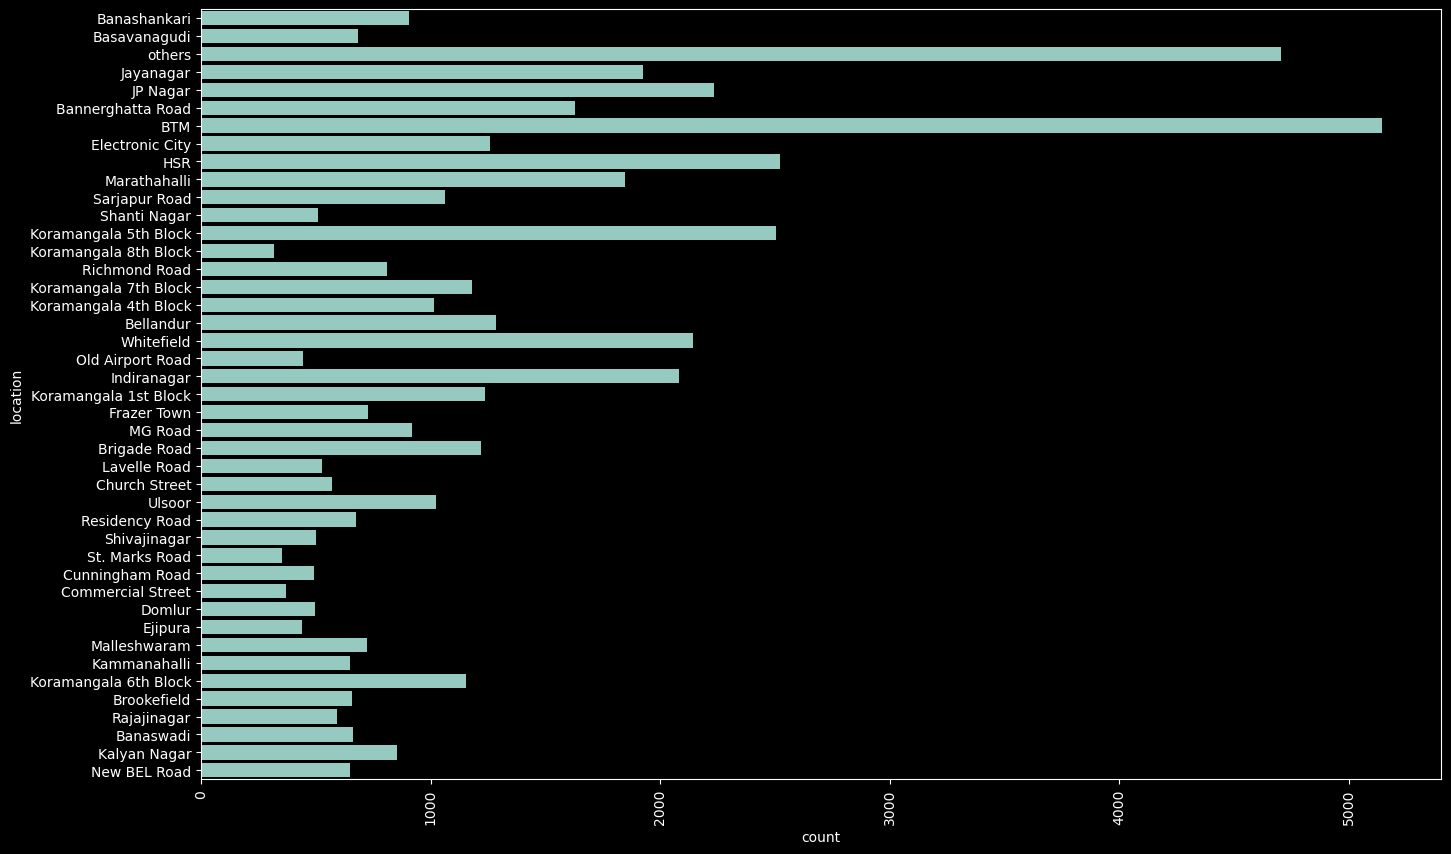

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
lo =sns.countplot(zomatoB["location"])
plt.xticks(rotation=90)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11180\3712877230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(zomatoB["online_order"],palette=["red","blue"])


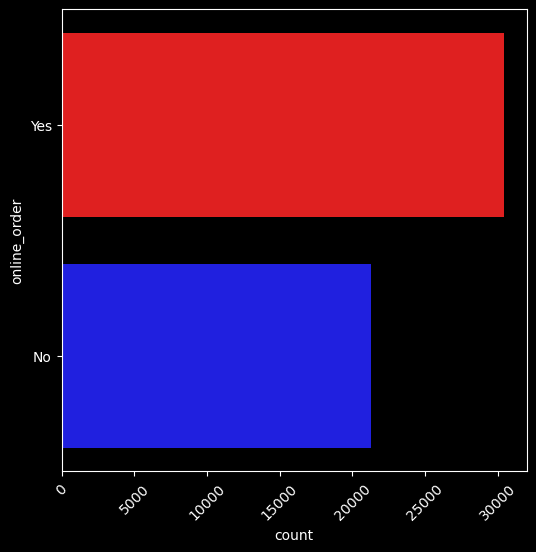

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,6))

sns.countplot(zomatoB["online_order"],palette=["red","blue"])
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11180\3044385639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(zomatoB["book_table"],palette=["red","blue"])


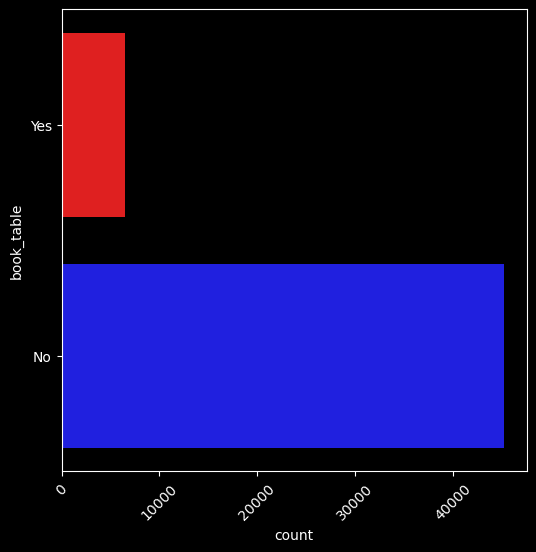

In [ ]:
plt.figure(figsize=(6,6))

sns.countplot(zomatoB["book_table"],palette=["red","blue"])
plt.xticks(rotation=45)
plt.show()

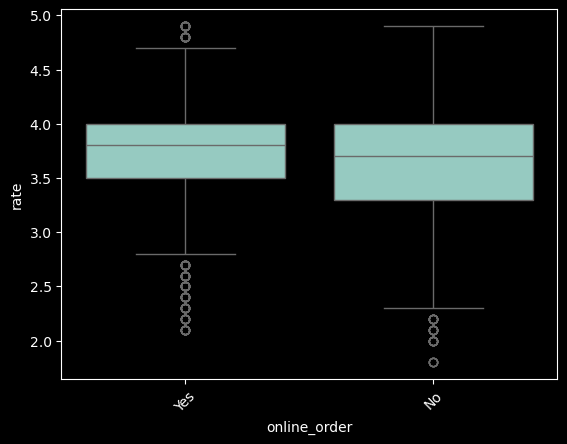

In [ ]:


sns.boxplot(x="online_order",y="rate",data = zomatoB)
plt.xticks(rotation=45)
plt.show()

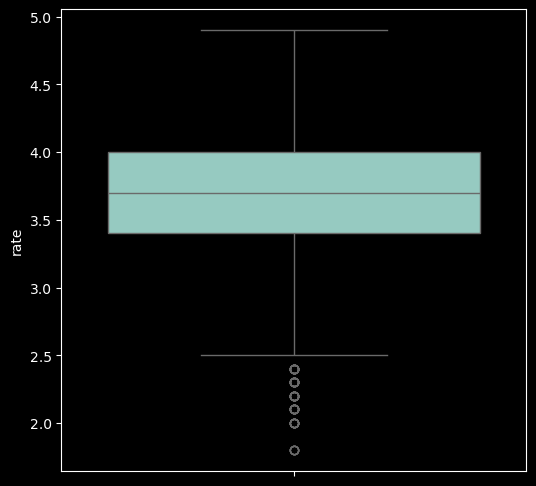

In [ ]:
plt.figure(figsize=(6,6))

sns.boxplot(zomatoB["rate"])
plt.xticks(rotation=45)
plt.show()

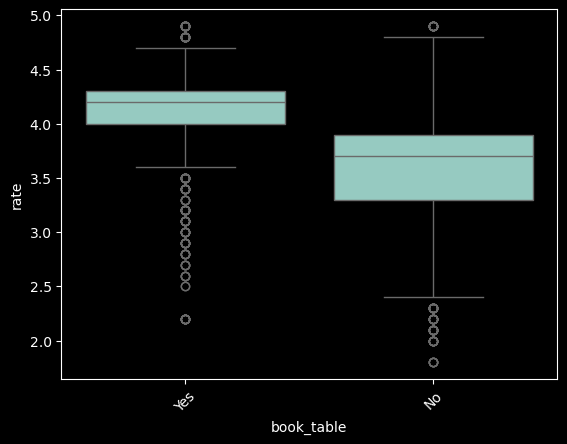

In [ ]:

sns.boxplot(x="book_table",y="rate",data = zomatoB)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Group by location and online_order and count the names
df = zomatoB.groupby(["location", "online_order"])["name"].count()

# Save the grouped data to a CSV file
df.to_csv("location_online.csv")

# Read the CSV file
df = pd.read_csv("location_online.csv")

# Pivot the table to make 'online_order' a column
df_pivot = pd.pivot_table(df, values="name", index=["location"], columns=["online_order"], fill_value=0, aggfunc=np.sum)

# Show the pivot table
df_pivot


C:\Users\HP\AppData\Local\Temp\ipykernel_11180\261348723.py:14: FutureWarning: The provided callable <function sum at 0x0000023786274900> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_pivot = pd.pivot_table(df, values="name", index=["location"], columns=["online_order"], fill_value=0, aggfunc=np.sum)


online_order,No,Yes
location,,
BTM,1813,3332
Banashankari,397,509
Banaswadi,321,343
Bannerghatta Road,706,924
Basavanagudi,243,441
Bellandur,525,761
Brigade Road,553,665
Brookefield,241,417
Church Street,226,343


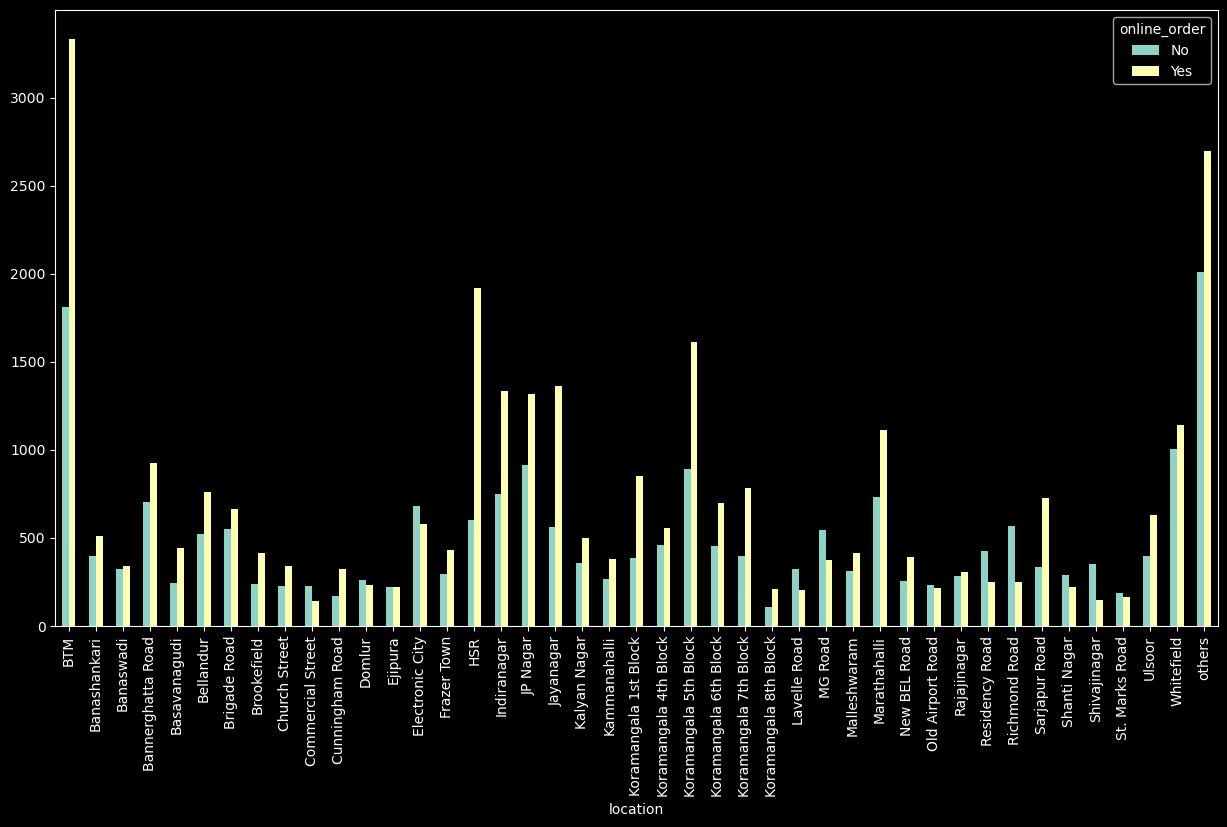

In [ ]:
df_pivot.plot(kind="bar",figsize=(15,8))
plt.show()

In [ ]:
# Group by location and online_order and count the names
df2 = zomatoB.groupby(["location", "book_table"])["name"].count()

# Save the grouped data to a CSV file
df2.to_csv("location_book_table.csv")

# Read the CSV file
df2 = pd.read_csv("location_book_table.csv")

# Pivot the table to make 'online_order' a column
df2_pivot = pd.pivot_table(df, values="name", index=["location"], columns=["book_table"], fill_value=0, aggfunc=np.sum)

# Show the pivot table
df2_pivot


C:\Users\HP\AppData\Local\Temp\ipykernel_11180\2777195820.py:11: FutureWarning: The provided callable <function sum at 0x0000023786274900> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2_pivot = pd.pivot_table(df2, values="name", index=["location"], columns=["book_table"], fill_value=0, aggfunc=np.sum)


book_table,No,Yes
location,,
BTM,4977,168
Banashankari,842,64
Banaswadi,656,8
Bannerghatta Road,1531,99
Basavanagudi,668,16
Bellandur,1188,98
Brigade Road,1039,179
Brookefield,584,74
Church Street,387,182


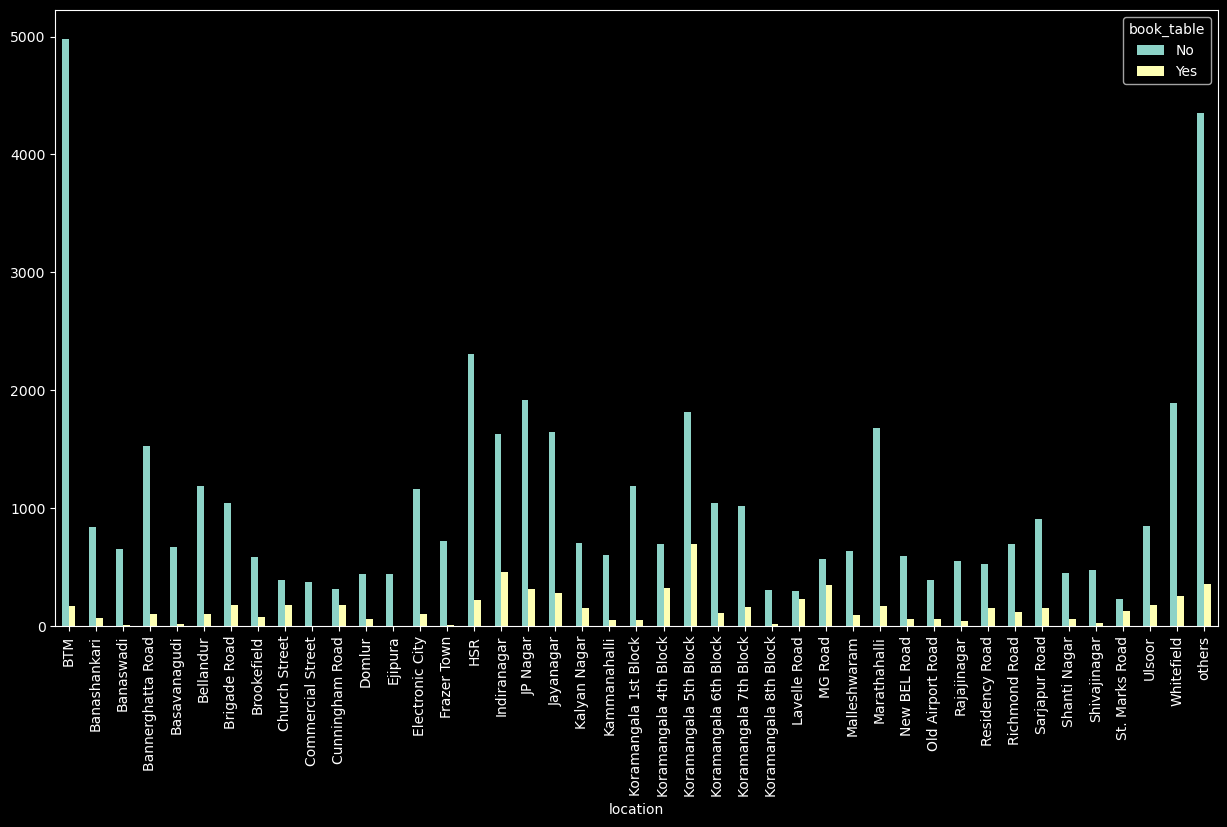

In [ ]:
df2_pivot.plot(kind="bar",figsize=(15,8))
plt.show()

<Axes: xlabel='type', ylabel='rate'>

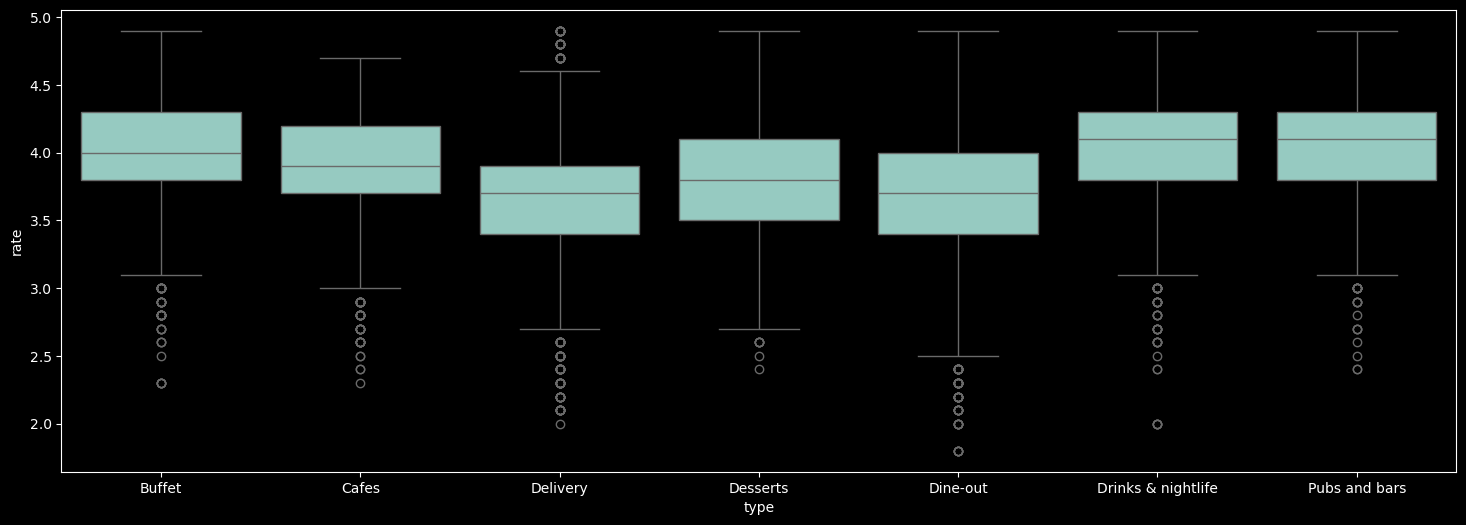

In [ ]:
plt.figure(figsize=(18,6))
sns.boxplot(x = "type", y= "rate",data=zomatoB)

In [ ]:

# Group by location and type and count the names
df3 = zomatoB.groupby(["location", "type"])["name"].count()

# Save the grouped data to a CSV file
df3.to_csv("location_type.csv")

# Read the CSV file
df3 = pd.read_csv("location_type.csv")

# Pivot the table to make 'type' a column
df3_pivot = pd.pivot_table(df3, values= None, index=["location"], columns=["type"], fill_value=0, aggfunc=np.sum)

# Show the pivot table
df3_pivot


C:\Users\HP\AppData\Local\Temp\ipykernel_11180\539160623.py:11: FutureWarning: The provided callable <function sum at 0x0000023786274900> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3_pivot = pd.pivot_table(df3, values= None, index=["location"], columns=["type"], fill_value=0, aggfunc=np.sum)


name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       29    84     3104      202     1685   
Banashankari               7    36      420       71      358   
Banaswadi                  0    24      323       37      273   
Bannerghatta Road          9    46      842      137      585   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      627       77      485   
Brigade Road              25    46      504      108      455   
Brookefield                6    17      340       45      246   
Church Street             19    51      196       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      195       26      184   
Domlur                    15    17      261       35      144   
Ejipura                    0     0      251       16      172   
Electronic City           23    24      577       71      521   
Frazer Town                1    11      481       56      174   
HSR                       19    49     1716      123      584   
Indiranagar               38   100     1118      146      543   
JP Nagar                  45    76     1160      166      730   
Jayanagar                 27    77     1049      182      579   
Kalyan Nagar               9    45      370       88      323   
Kammanahalli               2    27      333       35      245   
Koramangala 1st Block      3    26      718       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   151     1083      210      853   
Koramangala 6th Block     18    43      528       70      423   
Koramangala 7th Block     25    52      509      127      417   
Koramangala 8th Block      0    10      213       28       67   
Lavelle Road              30    27      131       50      195   
MG Road                   51    78      272       73      349   
Malleshwaram              11    31      272       85      292   
Marathahalli              37    32      995      107      644   
New BEL Road               4    29      341       34      225   
Old Airport Road          12     5      204       37      167   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      188       63      291   
Richmond Road             63    25      258       78      360   
Sarjapur Road             26    23      565       83      326   
Shanti Nagar               9    22      201       39      229   
Shivajinagar               6    17      144       37      280   
St. Marks Road             5    10      115       10      150   
Ulsoor                    16    56      468       71      359   
Whitefield                28    51     1068      139      778   
others                    84   123     2615      253     1512   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          58            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            12  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR    

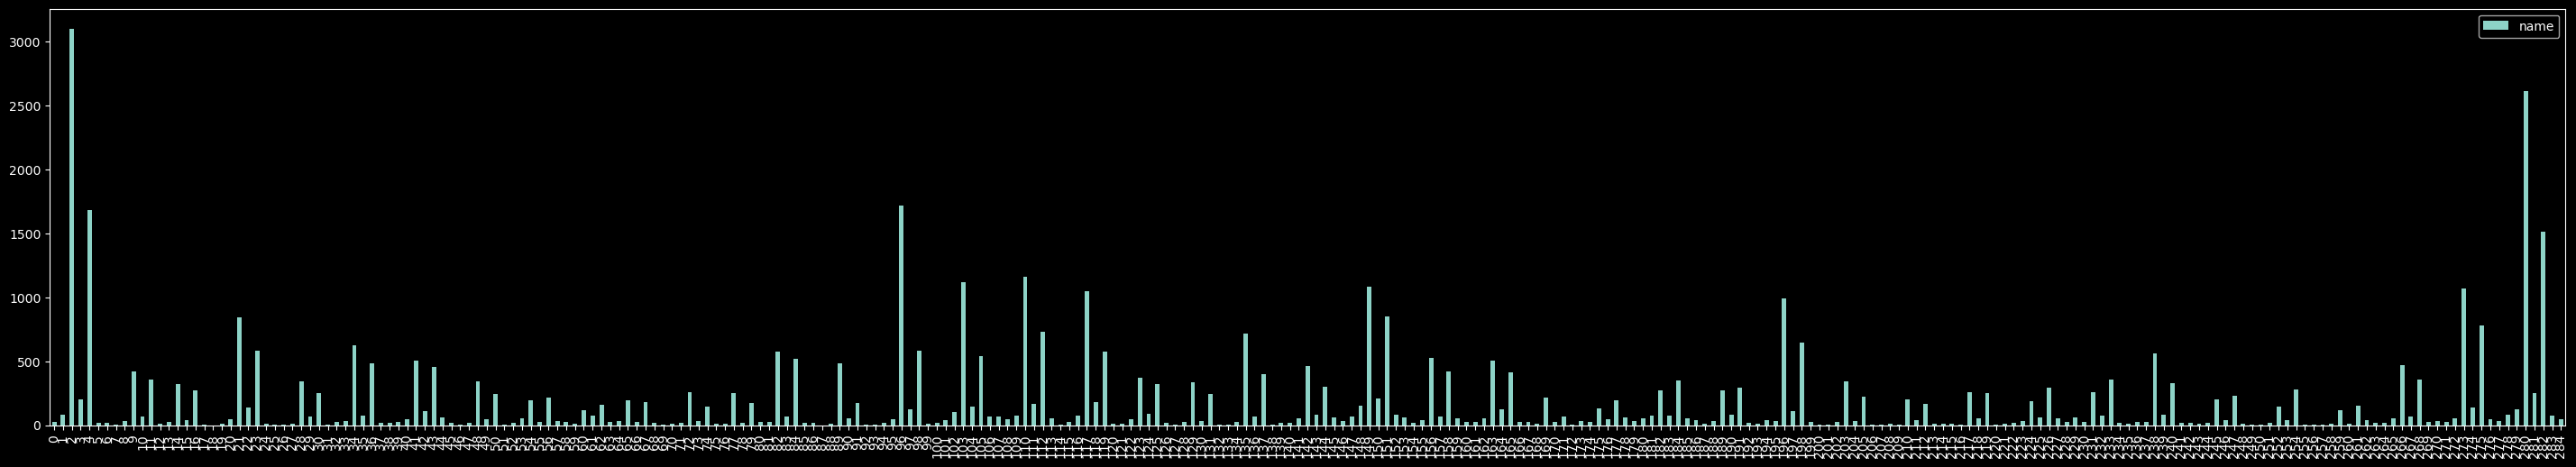

In [ ]:
df3.plot(kind ="bar",figsize = (36,6) )
plt.show()
